### Logistic Regression from Scratch

Logistic Regression is a Supervised Machine Learning algorithm that we use to predict the Categorical variable, it can be used for Multi-class Classification purpose as well but mostly Practitioners use it for Binary Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
data = load_wine()

In [3]:
df = pd.DataFrame(data.data)

In [4]:
df["target"] = data.target

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df["target"].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  target  178 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


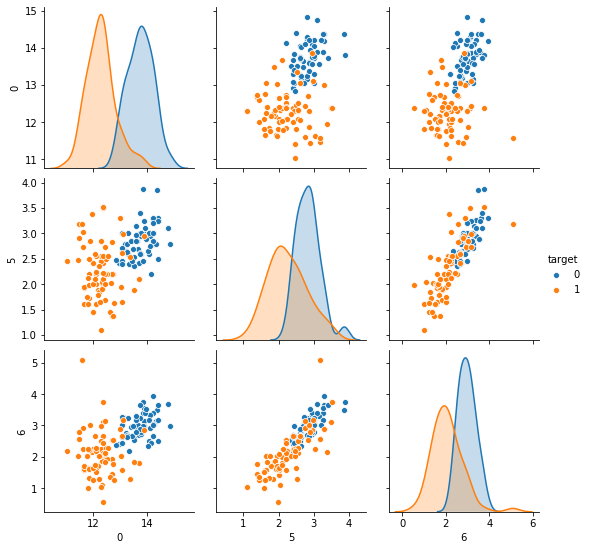

In [15]:
sns.pairplot(df, hue  = "target")

In [12]:
df = df[df["target"] <= 1]

In [14]:
df = df[[0,5,6,"target"]]

In [17]:
def sigmoid(x, weights):
    hx = np.dot(x, weights)
    return 1/(1 + np.exp(-hx))

In [18]:
def cost_function(hx, y):
    return np.sum(-(y*np.log(hx) + (1-y)*np.log(1-y)))/len(y)

In [98]:
def gradient_func(y, hx, x):
    return np.dot((y - hx), x)/len(y)

In [81]:
def update_parameters( weights, gradients, learning_rate = 0.01):
    weights +=  learning_rate * gradients
    return weights

In [40]:
tx = pd.DataFrame( {"one" : [1,2,3,4,5,11,12,13,14,15], "two" :  [10,9,8,7,6,5,4,3,2,1], "target" : [1,1,1,1,1,0,0,0,0,0]})
tx

,one,two,target
0,1,10,1
1,2,9,1
2,3,8,1
3,4,7,1
4,5,6,1
5,11,5,0
6,12,4,0
7,13,3,0
8,14,2,0
9,15,1,0


In [65]:
weights = np.random.randn(2)*0.01
weights

array([-0.00066793, -0.00281783])

In [73]:
ts = np.array(tx[["one","two"]])
ty = tx["target"]

In [69]:
hx = sigmoid(ts, weights)

In [78]:
grads = gradient_func(ty, hx, ts)

In [82]:
update_parameters(weights, grads)

array([-0.23706356, -0.23921346])

In [120]:
X = df.drop("target", axis =1)
y = df["target"]

In [148]:
weights = np.random.randn(3)*0.01
for i in range(4000):
    hx = sigmoid(X, weights)
    grads = gradient_func(y, hx, X)
    weights = update_parameters(weights, grads)

ys_pred = []
for i in sigmoid(X, weights):
    if i < 0.5:
        ys_pred.append(0)
    else:
        ys_pred.append(1)

In [126]:
df["pred"] = ys_pred

In [149]:
confusion_matrix(y, ys_pred)

array([[47, 12],
       [18, 53]], dtype=int64)

In [153]:
clf = LogisticRegression(penalty= 'none')
clf.fit(X,y)

LogisticRegression(penalty='none')

In [156]:
confusion_matrix(y, clf.predict(X))

array([[56,  3],
       [ 5, 66]], dtype=int64)